**Created By Abdallatif Qarabash**
<p style="text-align: center; font-size: 40px;">Datathon 2023</p>

## Table of Contents
* ####  [1. Introduction](#introduction1)
* ####  [2. Imports](#import)
* ####  [3.  Read Train & Test Data Set](#read_data)
* ####  [4. Exploratory Data Analysis](#exp_data)
    * ##### [4.1 Check Data](#check_data)
    * ##### [4.2 Examine data](#exm_data)
    * ##### [4.3 Split Columns to (Category, Numerical, Kardinal) data](#split_cols)
    * ##### [4.4 Examine Categorical Columns](#exm_cat_cols)
    * ##### [4.5 Examine Numerical Columns](#exm_num_cols)
    * ##### [4.6 Examine the relationship between variables](#exm_var_cols)
    * ##### [4.7 Anlysis between categorical columns and target column](#analysis_bet_cat_cols)
    * ##### [4.8 Anlysis between numerical columns and target column](#analysis_bet_num_cols)
    * ##### [4.9 Corelations](#corr)

* ####  [5. Data Preprocessing & Feature Engineering](#data_pr_feature_eng)
    * ##### [5.1 Feature Engineering](#feature_eng)
    * ##### [5.2 Data Preprocessing](#data_pro)
     * ###### [5.2.1 Outliers](#outliers)
     * ###### [5.2.2 multivariate outlier](#mult_outlier) 
     * ###### [5.2.3 Missing Value](#miss_value) 
     * ###### [5.2.4 Label Encoder](#label_enc) 
     * ###### [5.2.5 One Hot Encoding](#one_hot_enc) 
     * ###### [5.2.6 Scaling](#scaling)
     * ###### [5.2.7 Split Data](#split_data) 

* ####  [6. Base Model](#bese_model)
    * ##### [6.1 Model Params](#model_params)
    * ##### [6.2 Test Train set by Cross Validation](#cross_val)

* ####  [7. Hyperparameter Optimization](#hyper_opt)
    * ##### [7.1 Choose Model Params](#choose_model_params)
    * ##### [7.2 Optimization Base Model By Grid Search](#grid_search_opt)
    * ##### [7.3 Random Search Optimization](#random_search_opt)
* ####  [8. Stacking & Ensemble Learning](#stack_ens_learn)
    * ##### [8.1 Votine Model](#votine_model)

* #### [9. Predictions](#predict)
    * ##### [9.1 Predict Model](#predict_model)
    * ##### [9.2 Load Data in Sample Submission file](#load_data)
    * ##### [9.3 Fit best Model](#fit_model)
    * ##### [9.4 Feature Impotance](#feature_importance)

## Introduction<a class="introduction" id="introduction1"></a>

**The contest is organized by BTK Academy, Google, Entrepreneurship Foundation and is featured in the Getting Started Guessing Contest series.**

**This competition aims to accurately predict the class of each sample data. The metric to be used to measure the success of the competition will be accuracy.**

## Imports<a class="imports" id="import"></a>

In [1]:
import warnings
import numpy as np #
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, GridSearchCV, RandomizedSearchCV

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/sample-test/sample_submission (2).csv
/kaggle/input/datathon2023/sample_submission.csv
/kaggle/input/datathon2023/test_x.csv
/kaggle/input/datathon2023/train.csv


In [2]:
warnings.simplefilter(action="ignore")

In [3]:
train_path = "/kaggle/input/datathon2023/train.csv"
test_path = "/kaggle/input/datathon2023/test_x.csv"

## Read Train & Test Data Set<a class="read_data" id="read_data"></a>

In [4]:
train_df = pd.read_csv(train_path, index_col=["index"])
test_df = pd.read_csv(test_path, index_col=["index"])

In [5]:
train_df.head()

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
index,,,,,,,,,,,,,
0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,obek_4,102.936904
1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,obek_5,82.176053
2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,obek_8,141.661426
3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,obek_3,17.097397
4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,obek_3,20.470459


In [6]:
test_df.head()

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi
index,,,,,,,,,,,,
0,Erkek,51-60,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,365331.930346,Köy veya Kasaba,Giyim,5566.587664,15.442635,Etmiyor,19.646460
1,Erkek,41-50,Bekar,Lise Mezunu,İşsiz veya Düzenli Bir İşi Yok,414899.236174,Büyük Şehir,Spor Malzemeleri,6756.766203,14.957246,Etmiyor,19.675863
2,Kadın,>60,Evli,Eğitimsiz,İşsiz veya Düzenli Bir İşi Yok,152825.872271,Küçük Şehir,Giyim,4493.915682,10.907930,Etmiyor,46.904518
3,Kadın,51-60,Evli,Doktora Ötesi,Düzenli ve Ücretli Bir İşi Var,489052.908472,Köy veya Kasaba,Kozmetik,42670.646595,32.333021,Etmiyor,48.083609
4,Erkek,18-30,Evli,Yüksek Lisans Mezunu,Kendi İşinin Sahibi,323635.711534,Küçük Şehir,Giyim,5959.266948,4.519968,Etmiyor,12.752491


## Exploratory Data Analysis<a class="exp_data" id="exp_data"></a>

<p style="font-family: 'Times New Roman', Times, serif; color:red; font-size: 20px "> Column Descriptions : </p>

* index
* Gender
* Age group
* Marital status
* Education level
* Employment Status
* Annual Average Income
* Living City
* Most Interested Product Group
* Annual Average Purchase Amount
* Annual Average Number of Products Ordered
* Education Continuation Status
* Annual Average Number of Items in the Basket
* Phrase Name - Label to guess

### Check Data <a class="check_data" id="check_data"></a>

In [7]:
print("train shape : ", train_df.shape)
print("test shape : ", test_df.shape)

train shape :  (5460, 13)
test shape :  (2340, 12)


**Join train & test dataset**

In [8]:
train_df = train_df.append(test_df, ignore_index=True)

***Since it will have the same operation on the train and test dataset, we combined the two.***

In [9]:
train_df.shape

(7800, 13)

In [10]:
train_df["Öbek İsmi"].isnull().sum()

2340

### Examine data<a class="exm_data" id="exm_data"></a>

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7800 entries, 0 to 7799
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Cinsiyet                                    7800 non-null   object 
 1   Yaş Grubu                                   7800 non-null   object 
 2   Medeni Durum                                7800 non-null   object 
 3   Eğitim Düzeyi                               7800 non-null   object 
 4   İstihdam Durumu                             7800 non-null   object 
 5   Yıllık Ortalama Gelir                       7800 non-null   float64
 6   Yaşadığı Şehir                              7800 non-null   object 
 7   En Çok İlgilendiği Ürün Grubu               7800 non-null   object 
 8   Yıllık Ortalama Satın Alım Miktarı          7800 non-null   float64
 9   Yıllık Ortalama Sipariş Verilen Ürün Adedi  7800 non-null   float64
 10  Eğitime Deva

In [12]:
train_df.describe([0, 0.05, 0.50, 0.75, 0.95, 0.99]).T

,count,mean,std,min,0%,5%,50%,75%,95%,99%,max
Yıllık Ortalama Gelir,7800.0,363175.503458,220754.304558,43922.988693,43922.988693,150664.584454,286047.707342,467965.971785,895297.509295,1.038487e+06,1.229399e+06
Yıllık Ortalama Satın Alım Miktarı,7800.0,16633.919732,14148.566254,2859.254000,2859.254000,3736.698671,8365.111017,30650.140821,41290.508680,4.420159e+04,4.860559e+04
Yıllık Ortalama Sipariş Verilen Ürün Adedi,7800.0,23.868355,14.832138,0.000000,0.000000,3.948853,20.095924,35.189235,51.550790,5.734733e+01,6.461620e+01
Yıllık Ortalama Sepete Atılan Ürün Adedi,7800.0,73.035661,46.946478,3.977559,3.977559,9.447529,80.338417,104.359682,157.349666,1.924989e+02,2.423084e+02


***When we examine the numerical data, we can say that the standard deviation of all variables is smaller than the mean and there is no significant difference between the 99% quartile values and the maximum values, so we can say that there are no or very low outliers.***

In [13]:
target_name = "Öbek İsmi"

### Split Columns to (Category, Numerical, Kardinal) data<a class="split_cols" id="split_cols"></a>

In [14]:
def split_data(df, cat_th=10, car_th=20):
    cat_cols = [col for col in df.columns if df[col].nunique() < cat_th and df.select_dtypes(include=["object", "category", "bool"]).any().any()]
    num_cols = df.select_dtypes([int, float])
    num_cols = [col for col in num_cols if col not in cat_cols]
    
    num_but_cat = [col for col in df.columns if df[col].nunique() < cat_th and
                                                       df[col].dtypes != "O"]
    
    cat_but_car = [col for col in df.columns if df[col].nunique() > car_th and
                                                       df[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    print(f"Observations: {df.shape[0]}")
    print(f"Variables: {df.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [15]:
cat_cols, num_cols, cat_but_car = split_data(train_df)

Observations: 7800
Variables: 13
cat_cols: 9
num_cols: 4
cat_but_car: 0
num_but_cat: 0


In [16]:
cat_cols

['Cinsiyet',
 'Yaş Grubu',
 'Medeni Durum',
 'Eğitim Düzeyi',
 'İstihdam Durumu',
 'Yaşadığı Şehir',
 'En Çok İlgilendiği Ürün Grubu',
 'Eğitime Devam Etme Durumu',
 'Öbek İsmi']

*****We have separated the dataframe into numeric, categorical and cardinal variables so that we can observe the dataset well, analyze it and encoding it comfortably in the next step.*

### Examine Categorical Columns<a class="exm_cat_cols" id="exm_cat_cols"></a>

In [17]:
for col in cat_cols:
    print(col)
    print(pd.DataFrame({"Count": train_df[col].value_counts(),
           "Ratio": round(train_df[col].value_counts() / train_df.shape[0] * 100, 2)}))
    print("**************************")

Cinsiyet
       Count  Ratio
Erkek   4214  54.03
Kadın   3586  45.97
**************************
Yaş Grubu
       Count  Ratio
18-30   2551  32.71
31-40   2108  27.03
51-60   1266  16.23
41-50   1060  13.59
>60      815  10.45
**************************
Medeni Durum
       Count  Ratio
Evli    4082  52.33
Bekar   3718  47.67
**************************
Eğitim Düzeyi
                      Count  Ratio
Lise Mezunu            1970  25.26
Üniversite Mezunu      1763  22.60
Yüksekokul Mezunu       821  10.53
Yüksek Lisans Mezunu    811  10.40
Ortaokul Mezunu         620   7.95
İlkokul Mezunu          594   7.62
Eğitimsiz               558   7.15
Doktora Mezunu          370   4.74
Doktora Ötesi           293   3.76
**************************
İstihdam Durumu
                                Count  Ratio
Düzenli ve Ücretli Bir İşi Var   3961  50.78
İşsiz veya Düzenli Bir İşi Yok   1955  25.06
Kendi İşinin Sahibi              1234  15.82
Emekli                            650   8.33
***************

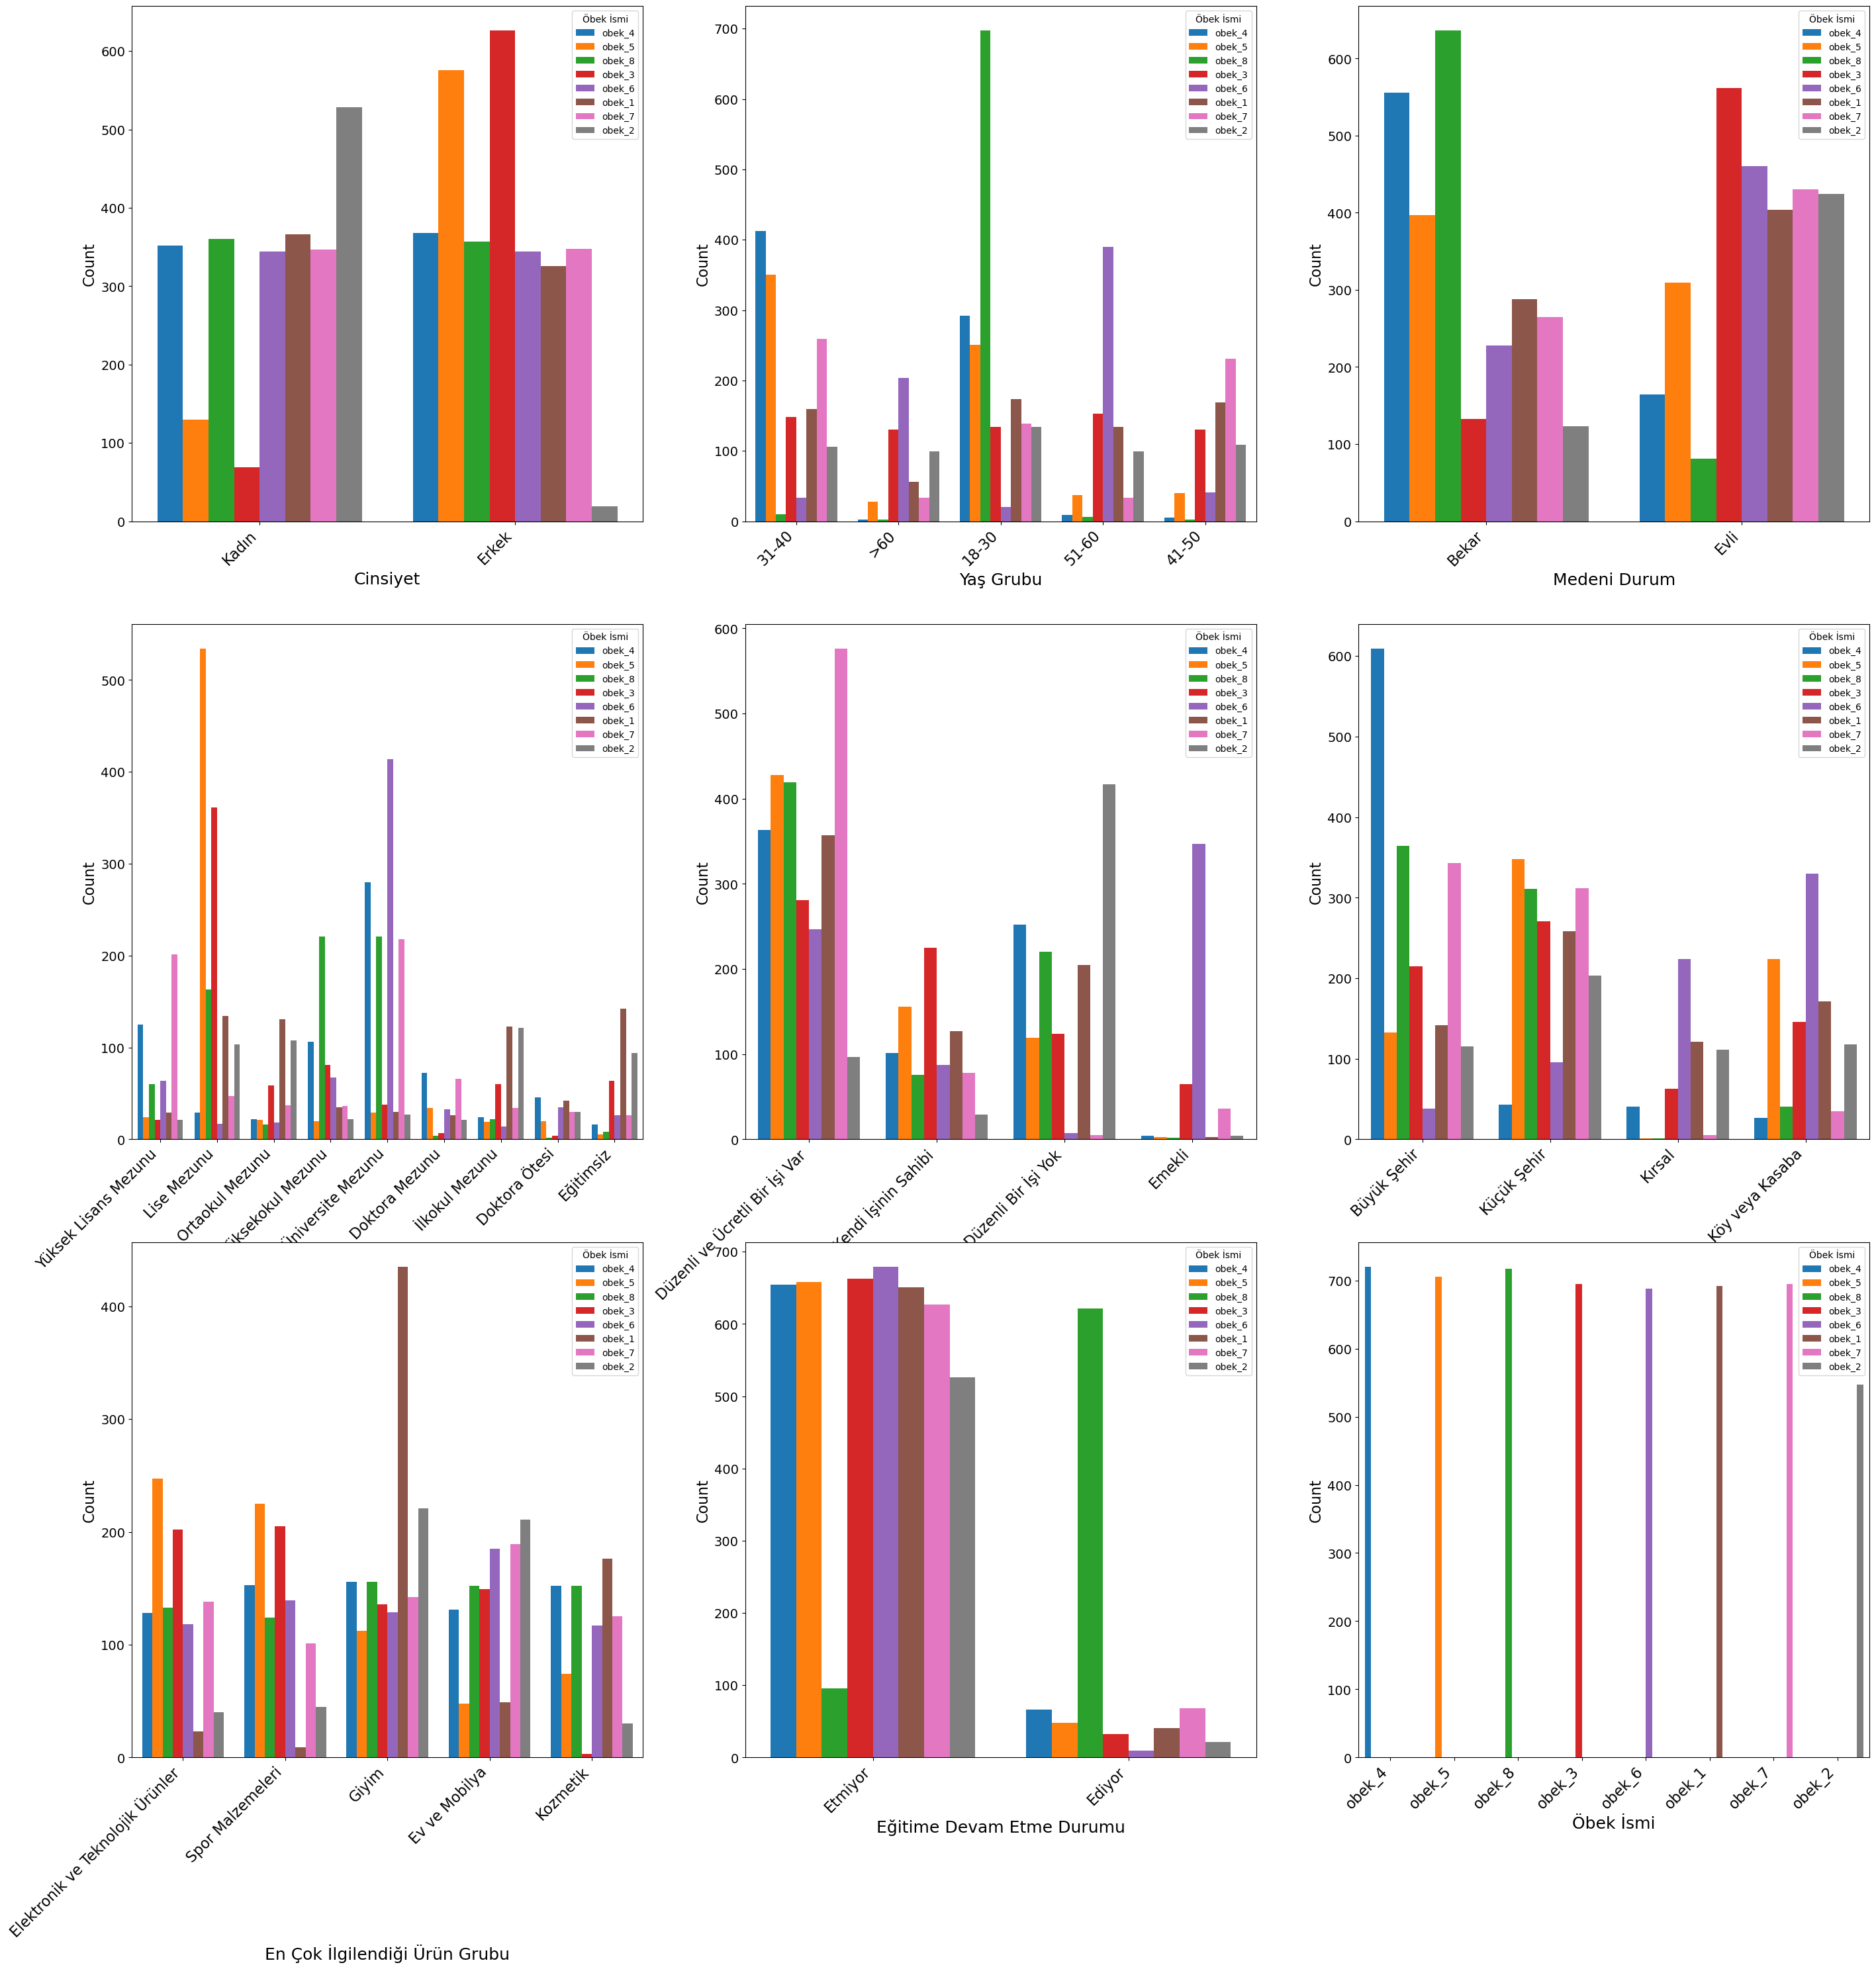

In [18]:
import math
width_cols = 3
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 14))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
for i, col in enumerate(cat_cols, start=1):
    plt.subplot(math.ceil(len(cat_cols) / width_cols), width_cols, i)
    sns.countplot(x=col, data=train_df, saturation=1,hue=target_name);
    plt.xlabel(col, fontsize=18)
    plt.ylabel("Count", fontsize=16)
    plt.xticks(fontsize=16, rotation=45, ha='right')
    plt.yticks(fontsize=14)

plt.show();

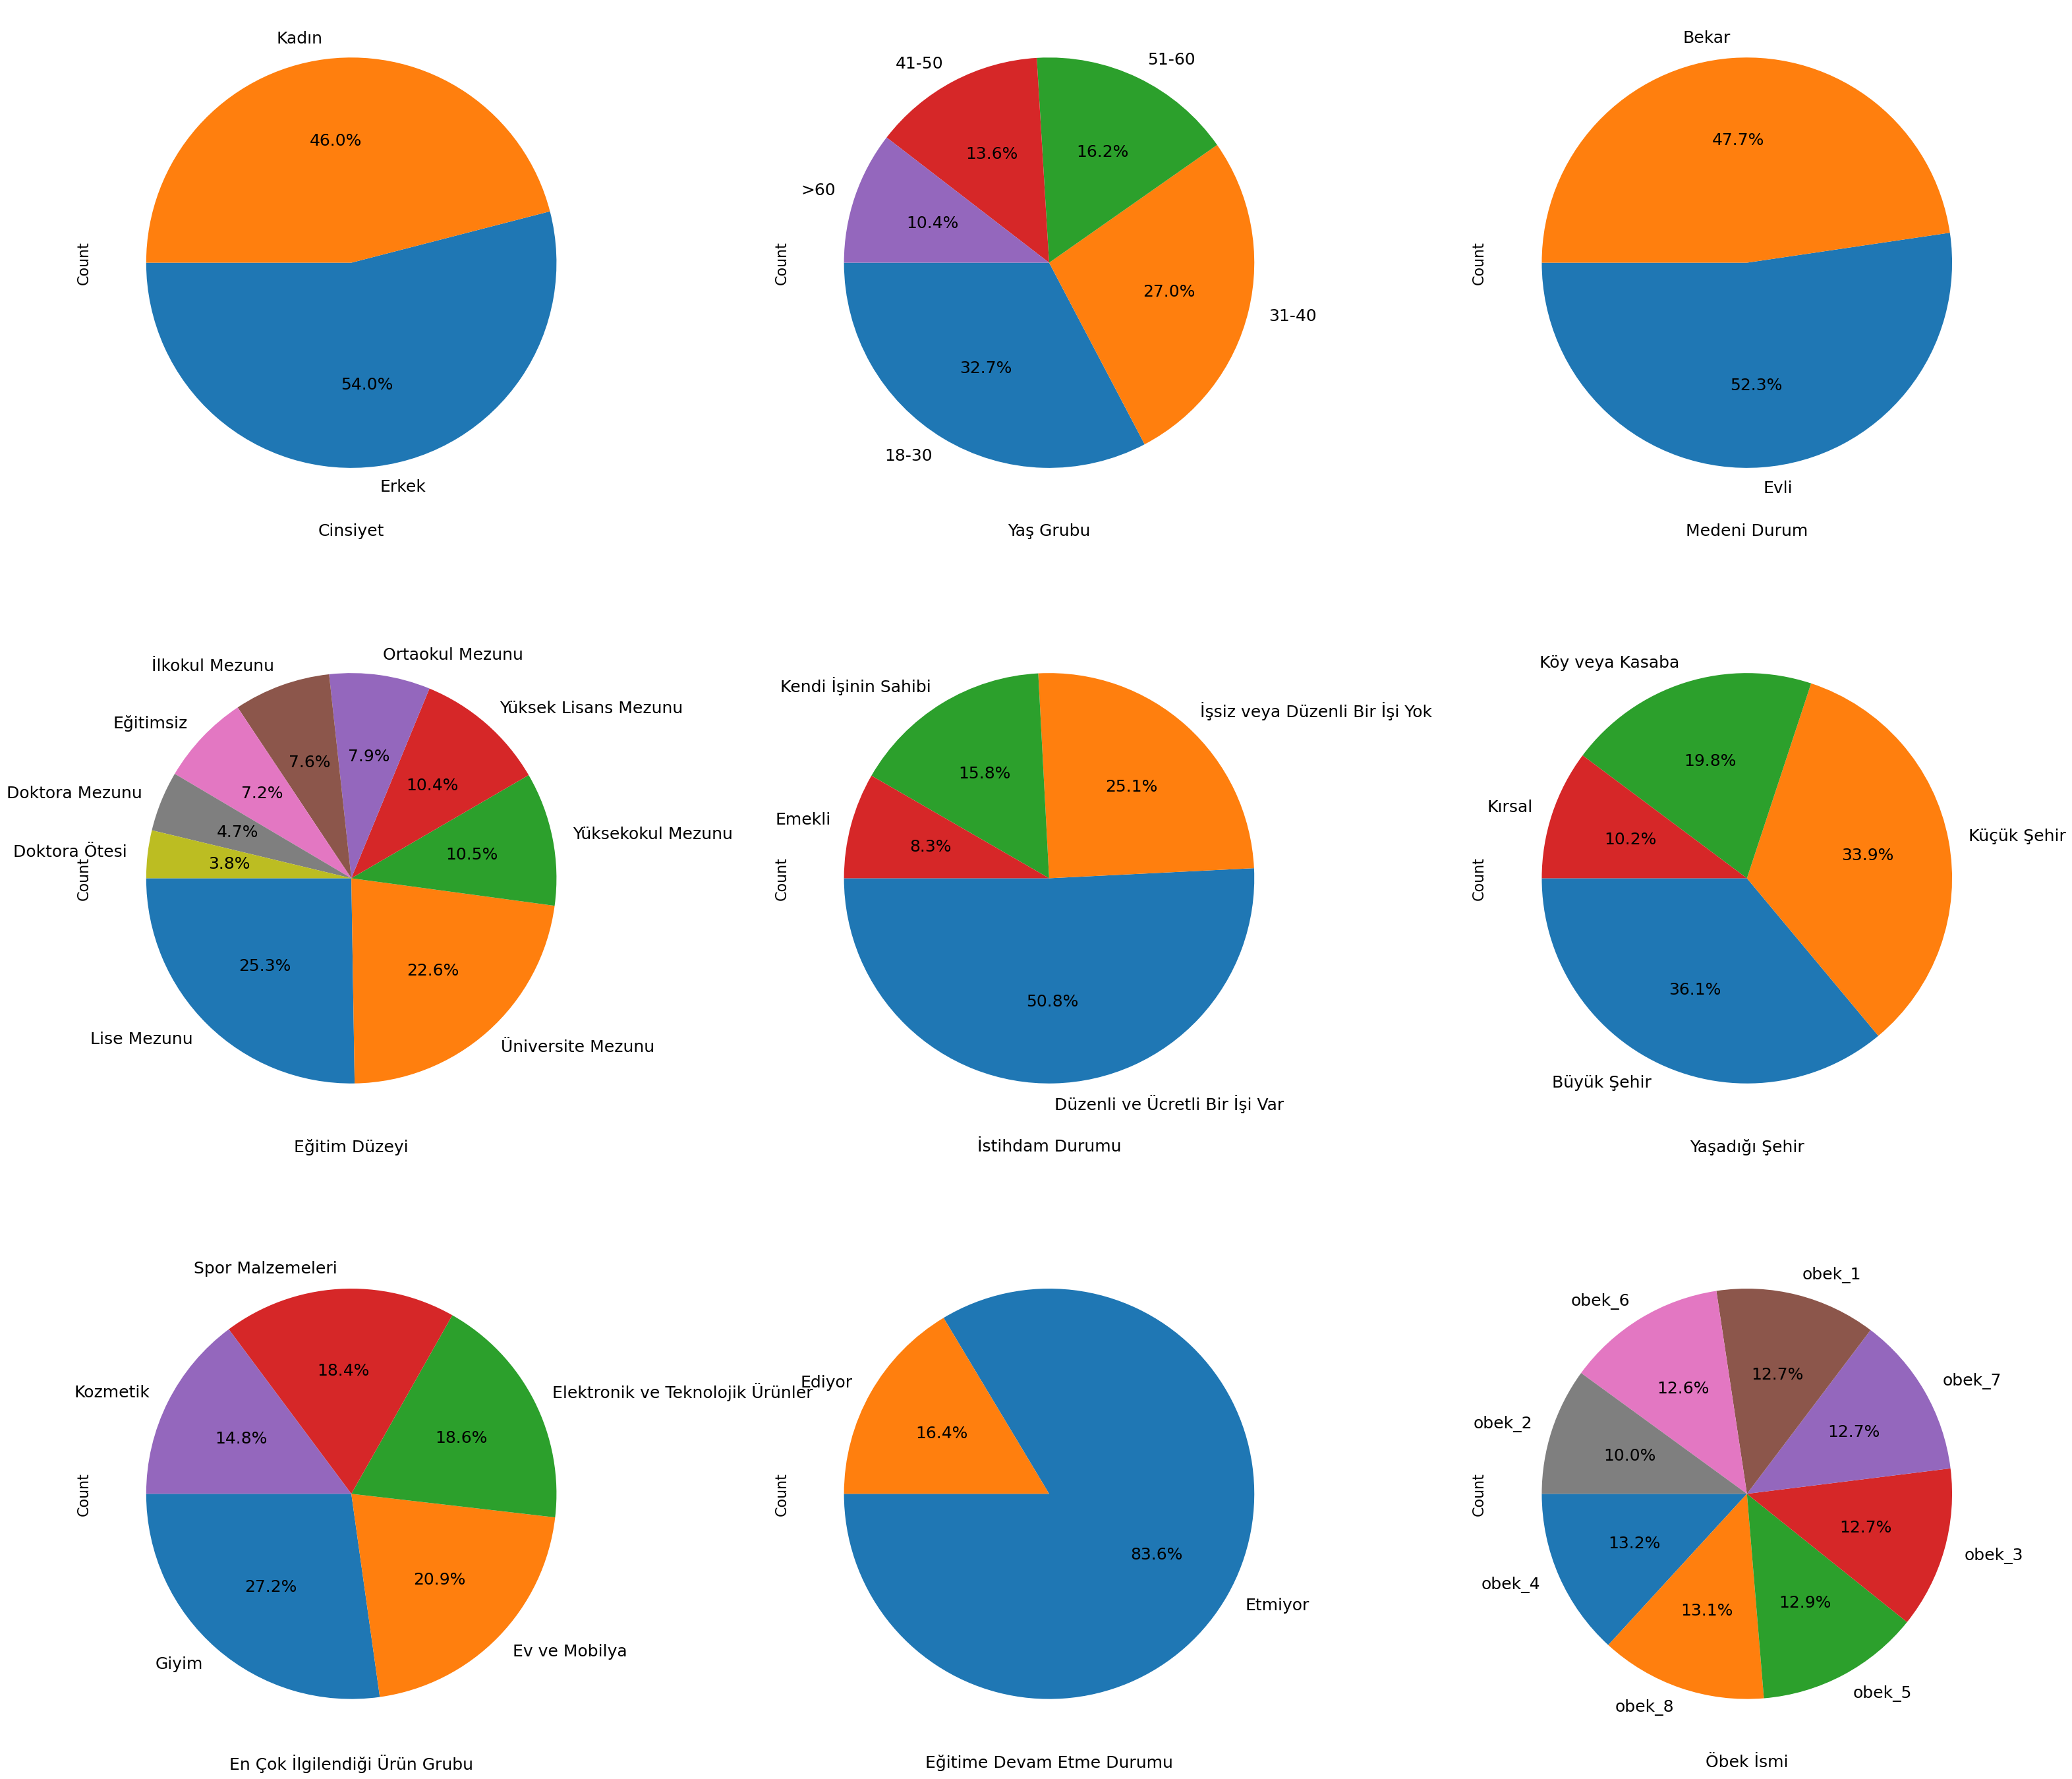

In [19]:
import math
width_cols = 3
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 14))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
plt.rcParams['font.size'] = 18.0
for i, col in enumerate(cat_cols, start=1):
    plt.subplot(math.ceil(len(cat_cols) / width_cols), width_cols, i)
    # sns.countplot(x=col, data=train_df, saturation=1,);
    plt.pie(train_df[col].value_counts(), labels=train_df[col].value_counts().index, autopct="%1.1f%%", startangle=180)
    plt.xlabel(col, fontsize=18)
    plt.ylabel("Count", fontsize=16)

plt.show();

### Examine Numerical Columns<a class="exm_num_cols" id="exm_num_cols"></a>

In [20]:
for col in num_cols:
    print(col)
    print(train_df[col].describe([0, 0.05, 0.50, 0.75, 0.95, 0.99]))
    print("**********************************************************")

Yıllık Ortalama Gelir
count    7.800000e+03
mean     3.631755e+05
std      2.207543e+05
min      4.392299e+04
0%       4.392299e+04
5%       1.506646e+05
50%      2.860477e+05
75%      4.679660e+05
95%      8.952975e+05
99%      1.038487e+06
max      1.229399e+06
Name: Yıllık Ortalama Gelir, dtype: float64
**********************************************************
Yıllık Ortalama Satın Alım Miktarı
count     7800.000000
mean     16633.919732
std      14148.566254
min       2859.254000
0%        2859.254000
5%        3736.698671
50%       8365.111017
75%      30650.140821
95%      41290.508680
99%      44201.586418
max      48605.594415
Name: Yıllık Ortalama Satın Alım Miktarı, dtype: float64
**********************************************************
Yıllık Ortalama Sipariş Verilen Ürün Adedi
count    7800.000000
mean       23.868355
std        14.832138
min         0.000000
0%          0.000000
5%          3.948853
50%        20.095924
75%        35.189235
95%        51.550790
99%     

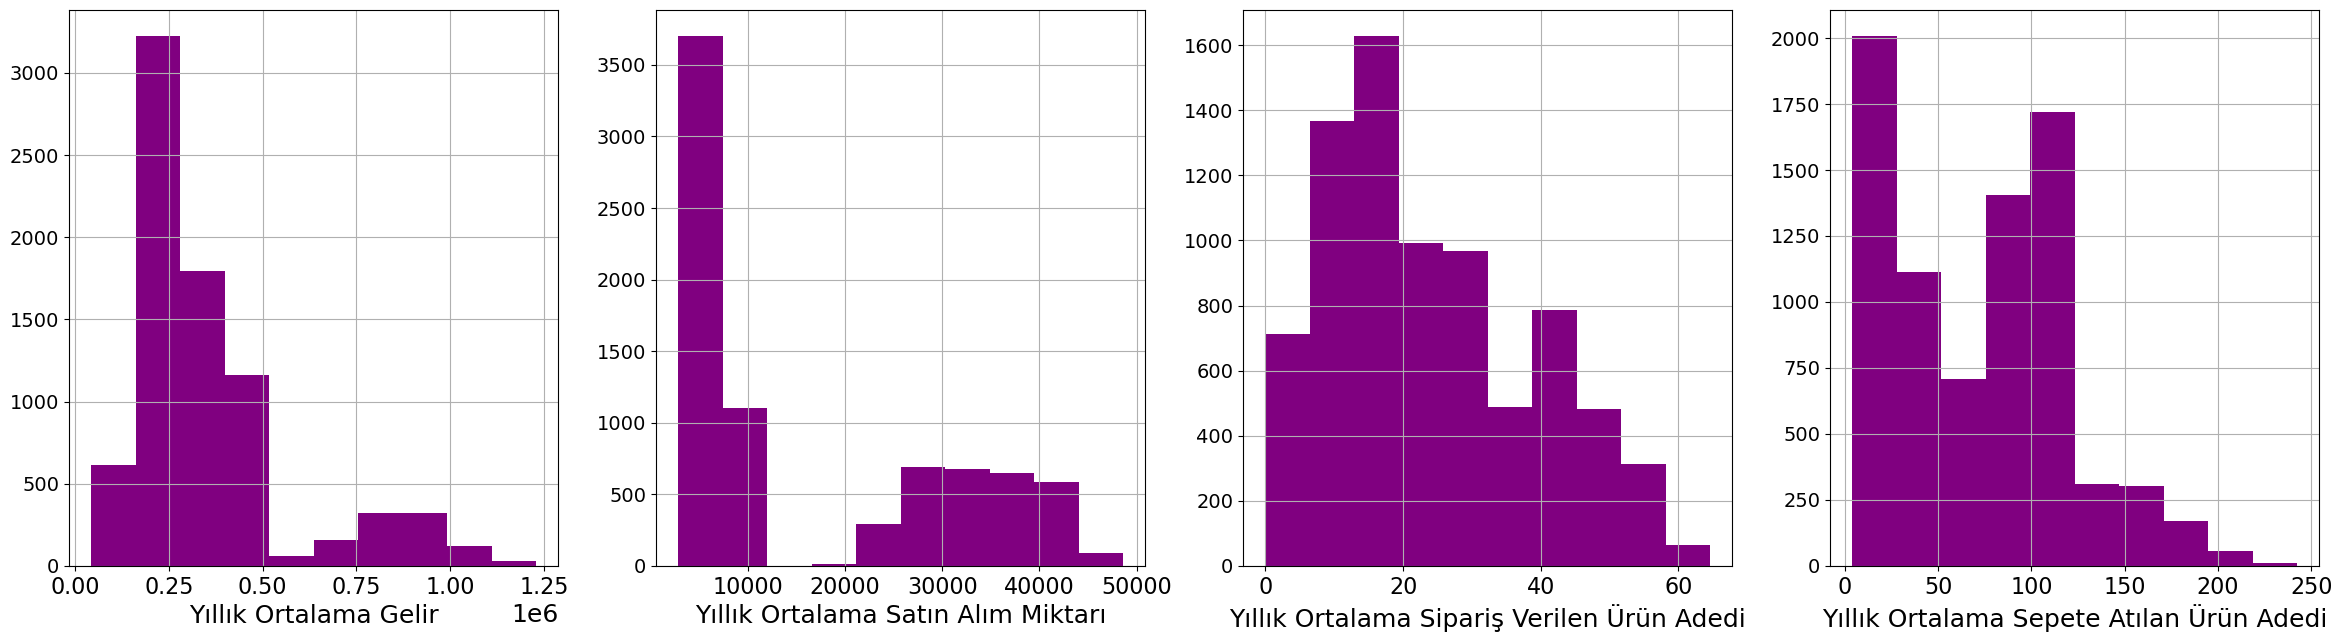

In [21]:
width_cols = 4
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
for i, col in enumerate(num_cols, start=1):
    plt.subplot(math.ceil(len(cat_cols) / width_cols), width_cols, i)
    train_df[col].hist(color='purple')
    plt.xlabel(col, fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=14)
    
plt.show();

In [22]:
print("skewness :\n", train_df[num_cols].skew())
print("kurtosis :\n", train_df[num_cols].kurt())

skewness :
 Yıllık Ortalama Gelir                         1.575245
Yıllık Ortalama Satın Alım Miktarı            0.652304
Yıllık Ortalama Sipariş Verilen Ürün Adedi    0.547543
Yıllık Ortalama Sepete Atılan Ürün Adedi      0.376440
dtype: float64
kurtosis :
 Yıllık Ortalama Gelir                         1.851046
Yıllık Ortalama Satın Alım Miktarı           -1.273437
Yıllık Ortalama Sipariş Verilen Ürün Adedi   -0.714899
Yıllık Ortalama Sepete Atılan Ürün Adedi     -0.470911
dtype: float64


**We can deduce the following meanings from numerical data analysis:**
*** 
* we can easily see the data distribution
* we can detect similarities and distribution type in data
* we can look for outliers in the data
* We can have an idea by looking at the training and peaks of the data.

### Examine the relationship between variables</a>

In [23]:
train_df.head()

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,obek_4,102.936904
1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,obek_5,82.176053
2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,obek_8,141.661426
3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,obek_3,17.097397
4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,obek_3,20.470459


In [24]:
train_df.groupby("Yaş Grubu").agg({"İstihdam Durumu": "value_counts"})

İstihdam Durumu
Yaş Grubu İstihdam Durumu                                
18-30     Düzenli ve Ücretli Bir İşi Var             1421
          İşsiz veya Düzenli Bir İşi Yok              743
          Kendi İşinin Sahibi                         353
          Emekli                                       34
31-40     Düzenli ve Ücretli Bir İşi Var             1158
          İşsiz veya Düzenli Bir İşi Yok              541
          Kendi İşinin Sahibi                         352
          Emekli                                       57
41-50     Düzenli ve Ücretli Bir İşi Var              608
          İşsiz veya Düzenli Bir İşi Yok              240
          Kendi İşinin Sahibi                         144
          Emekli                                       68
51-60     Düzenli ve Ücretli Bir İşi Var              495
          Emekli                                      319
          İşsiz veya Düzenli Bir İşi Yok              232
          Kendi İşinin Sahibi                         220
>60       Düzenli ve Ücretli Bir İşi Var              279
          İşsiz veya Düzenli Bir İşi Yok              199
          Emekli                                      172
          Kendi İşinin Sahibi                         165

In [25]:
train_df.loc[(train_df["Yaş Grubu"] == '18-30') & (train_df["İstihdam Durumu"] == 'Emekli'), 'İstihdam Durumu'] = train_df["İstihdam Durumu"].mode() 

In [26]:
train_df.groupby(["Yaş Grubu", "İstihdam Durumu"]).agg({target_name: "count"})

Öbek İsmi
Yaş Grubu İstihdam Durumu                          
18-30     Düzenli ve Ücretli Bir İşi Var       1016
          Kendi İşinin Sahibi                   256
          İşsiz veya Düzenli Bir İşi Yok        543
31-40     Düzenli ve Ücretli Bir İşi Var        812
          Emekli                                 38
          Kendi İşinin Sahibi                   255
          İşsiz veya Düzenli Bir İşi Yok        372
41-50     Düzenli ve Ücretli Bir İşi Var        410
          Emekli                                 49
          Kendi İşinin Sahibi                   103
          İşsiz veya Düzenli Bir İşi Yok        165
51-60     Düzenli ve Ücretli Bir İşi Var        339
          Emekli                                228
          Kendi İşinin Sahibi                   154
          İşsiz veya Düzenli Bir İşi Yok        140
>60       Düzenli ve Ücretli Bir İşi Var        191
          Emekli                                123
          Kendi İşinin Sahibi                   111
          İşsiz veya Düzenli Bir İşi Yok        129

In [27]:
train_df.groupby("Yaş Grubu").agg({"Eğitim Düzeyi": "value_counts"})

Eğitim Düzeyi
Yaş Grubu Eğitim Düzeyi                      
18-30     Lise Mezunu                     698
          Üniversite Mezunu               552
          Yüksekokul Mezunu               441
          Yüksek Lisans Mezunu            277
          İlkokul Mezunu                  155
          Ortaokul Mezunu                 148
          Eğitimsiz                       138
          Doktora Mezunu                   74
          Doktora Ötesi                    68
31-40     Lise Mezunu                     600
          Üniversite Mezunu               433
          Yüksek Lisans Mezunu            250
          Ortaokul Mezunu                 166
          Doktora Mezunu                  158
          Yüksekokul Mezunu               155
          İlkokul Mezunu                  136
          Eğitimsiz                       118
          Doktora Ötesi                    92
41-50     Lise Mezunu                     257
          Üniversite Mezunu               154
          Ortaokul Mezunu                 134
          Yüksek Lisans Mezunu            127
          İlkokul Mezunu                  125
          Eğitimsiz                       112
          Yüksekokul Mezunu                57
          Doktora Mezunu                   54
          Doktora Ötesi                    40
51-60     Üniversite Mezunu               420
          Lise Mezunu                     224
          Eğitimsiz                       116
          İlkokul Mezunu                  107
          Ortaokul Mezunu                 104
          Yüksekokul Mezunu               102
          Yüksek Lisans Mezunu             94
          Doktora Ötesi                    55
          Doktora Mezunu                   44
>60       Üniversite Mezunu               204
          Lise Mezunu                     191
          Eğitimsiz                        74
          İlkokul Mezunu                   71
          Ortaokul Mezunu                  68
          Yüksekokul Mezunu                66
          Yüksek Lisans Mezunu             63
          Doktora Mezunu                   40
          Doktora Ötesi                    38

In [28]:
train_df.groupby("İstihdam Durumu").agg({"Yıllık Ortalama Gelir": "mean"})

,Yıllık Ortalama Gelir
İstihdam Durumu,
Düzenli ve Ücretli Bir İşi Var,364678.210385
Emekli,456339.723516
Kendi İşinin Sahibi,356219.724573
İşsiz veya Düzenli Bir İşi Yok,334937.237587


In [29]:
train_df.groupby("Eğitime Devam Etme Durumu").agg({"Yıllık Ortalama Gelir": "mean"})

,Yıllık Ortalama Gelir
Eğitime Devam Etme Durumu,
Ediyor,293195.231379
Etmiyor,376901.123453


**As a result of the analysis between variables, 34 people in the 18-30 age group have a retired employment status, and we excluded these values from the dataset, assuming that these values are outliers.**

### Anlysis between categorical columns and target column<a class="analysis_bet_cat_cols" id="analysis_bet_cat_cols"></a>

In [30]:
target_name = "Öbek İsmi"
for col in cat_cols:
    print(pd.DataFrame({col: train_df.groupby(col)[target_name].value_counts(),
                       "Ratio": round(train_df.groupby(col)[target_name].value_counts() / len(train_df) * 100, 2)}))
    print("****************************************")

                    Cinsiyet  Ratio
Cinsiyet Öbek İsmi                 
Erkek    obek_3          626   8.03
         obek_5          576   7.38
         obek_4          368   4.72
         obek_8          357   4.58
         obek_7          348   4.46
         obek_6          344   4.41
         obek_1          326   4.18
         obek_2           19   0.24
Kadın    obek_2          528   6.77
         obek_1          366   4.69
         obek_8          360   4.62
         obek_4          352   4.51
         obek_7          347   4.45
         obek_6          344   4.41
         obek_5          130   1.67
         obek_3           69   0.88
****************************************
                     Yaş Grubu  Ratio
Yaş Grubu Öbek İsmi                  
18-30     obek_8           697   8.94
          obek_4           292   3.74
          obek_5           251   3.22
          obek_1           174   2.23
          obek_7           139   1.78
          obek_2           134   1.72
       

***When we look at the analysis here, we can see the effect, number and ratio of each variable on the target variable. By carefully analyzing the variables, it will give us an idea to derive new variables for the feature engineer in the next stages.***

### Anlysis between numerical columns and target column<a class="analysis_bet_num_cols" id="analysis_bet_num_cols"></a>

In [31]:
for col in num_cols:
    print(train_df.groupby(target_name).agg({col: ["mean", "count"]}))
    print("**************************************************")

          Yıllık Ortalama Gelir      
                           mean count
Öbek İsmi                            
obek_1            229513.847974   692
obek_2            172827.509911   547
obek_3            327899.094458   695
obek_4            817975.516312   720
obek_5            222224.036354   706
obek_6            480117.776102   688
obek_7            351949.976050   695
obek_8            255354.926670   717
**************************************************
          Yıllık Ortalama Satın Alım Miktarı      
                                        mean count
Öbek İsmi                                         
obek_1                           6047.195827   692
obek_2                           4996.038895   547
obek_3                           7360.697229   695
obek_4                          32405.008963   720
obek_5                           4542.305314   706
obek_6                          39440.273682   688
obek_7                          26429.293943   695
obek_8               

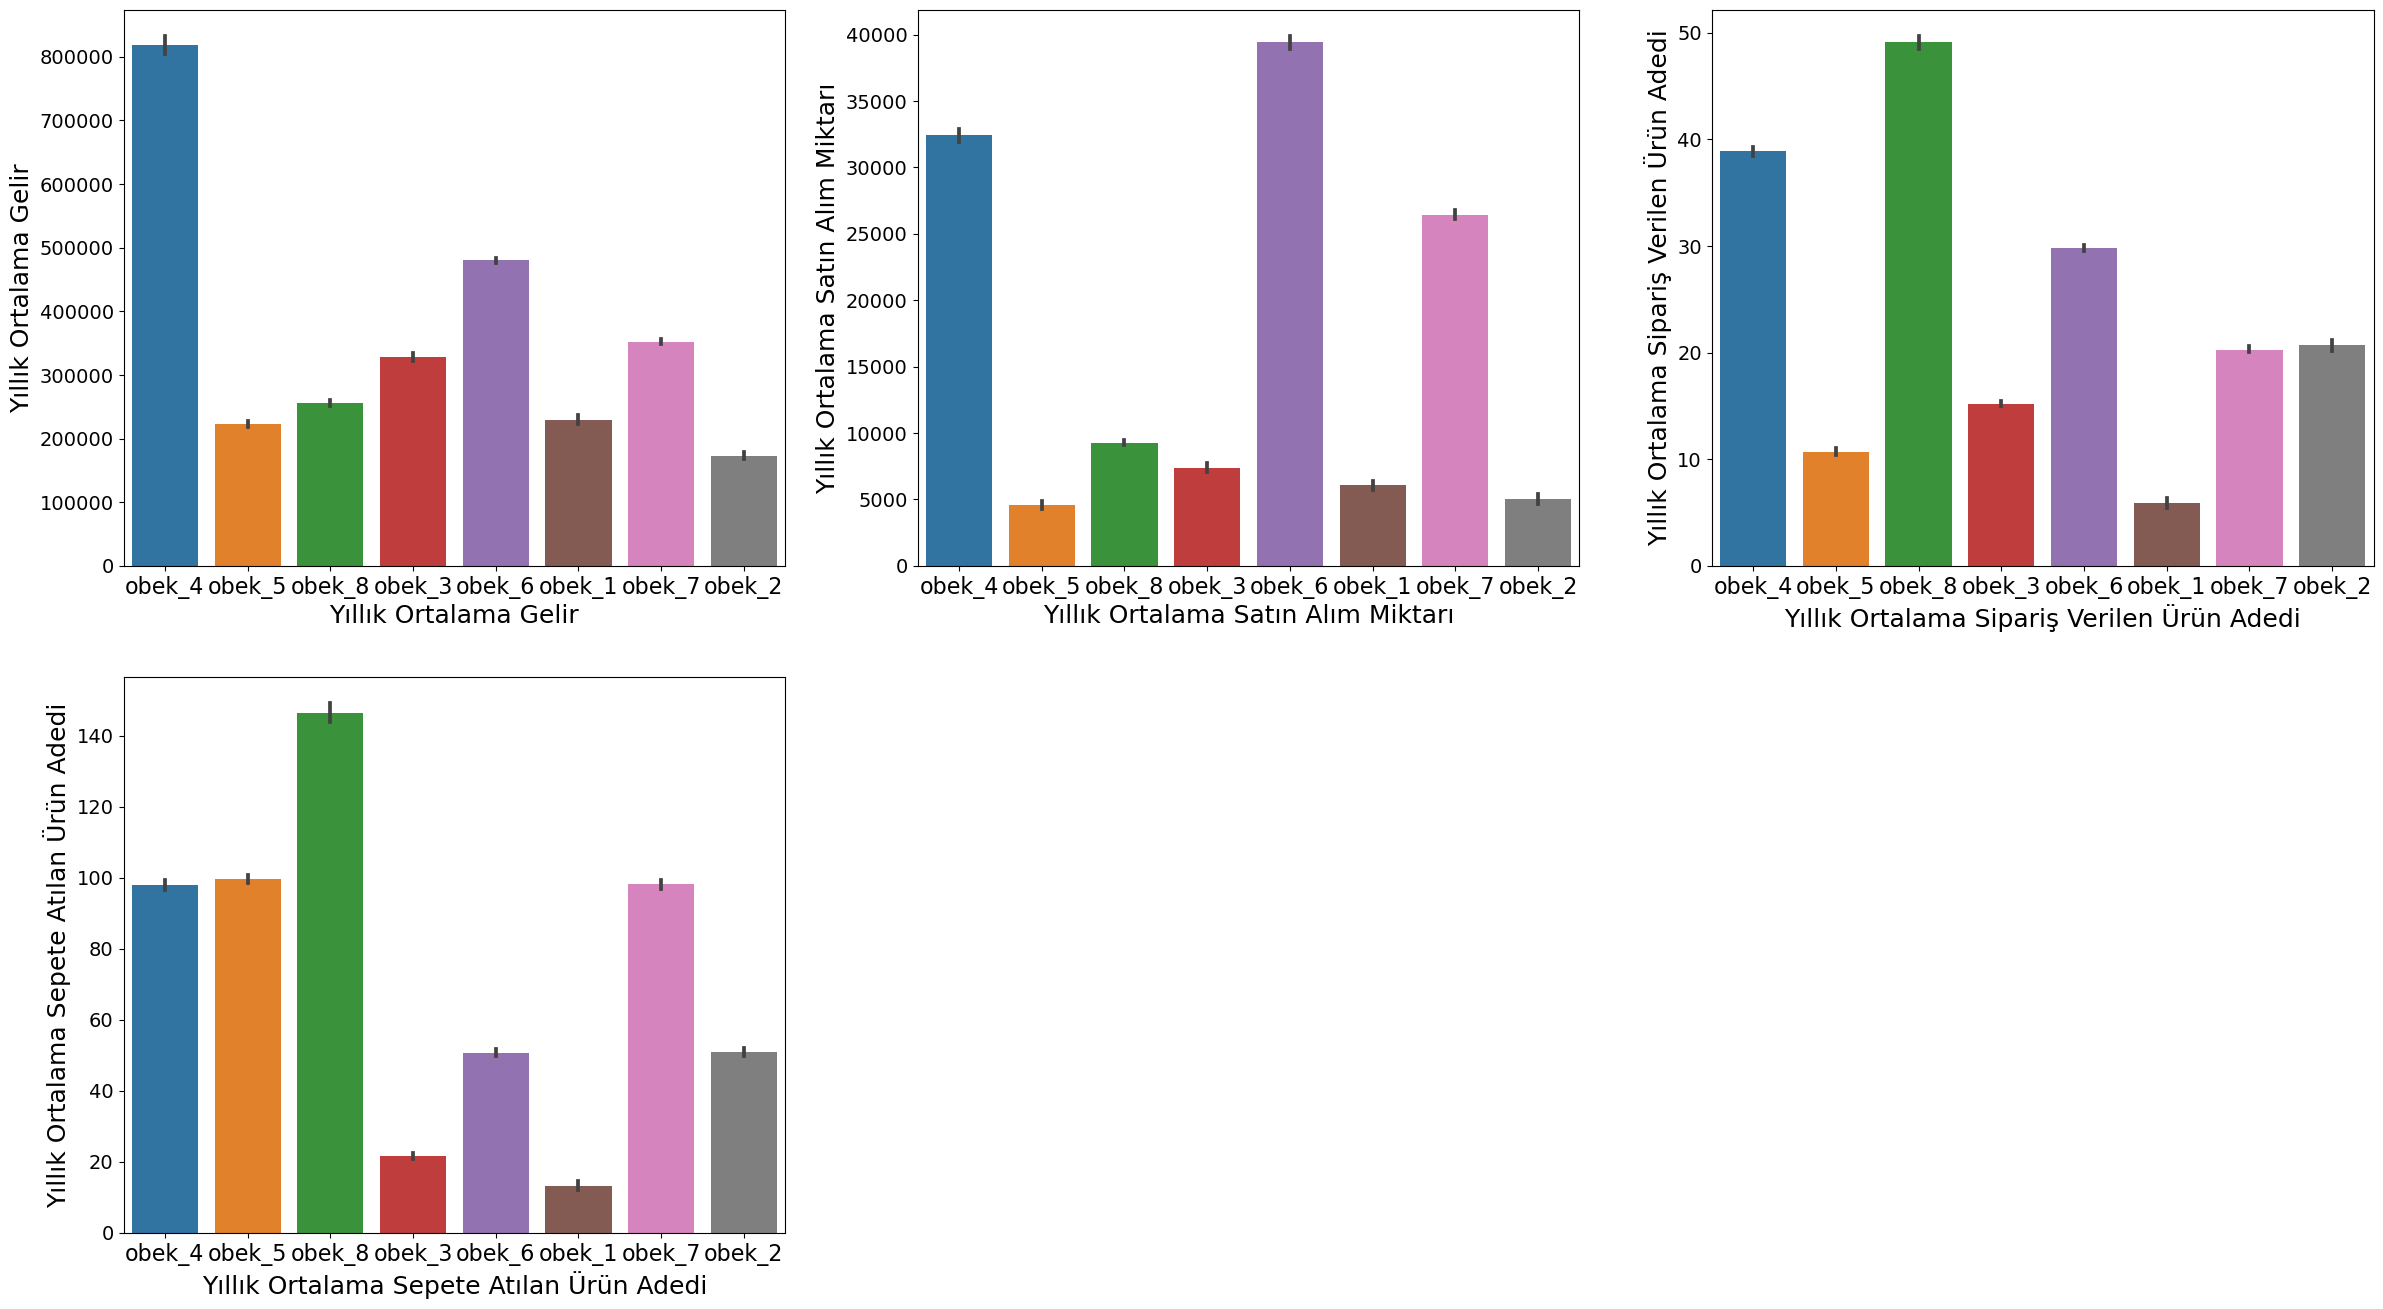

In [32]:
width_cols = 3
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
for i, col in enumerate(num_cols, start=1):
    plt.subplot(math.ceil(len(cat_cols) / width_cols), width_cols, i)
    sns.barplot(data=train_df, x=target_name, y=col)
    plt.xlabel(col, fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=14)
    
plt.show();

(array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012]),
 [Text(1, 0.0, '0.000'),
  Text(1, 0.002, '0.002'),
  Text(1, 0.004, '0.004'),
  Text(1, 0.006, '0.006'),
  Text(1, 0.008, '0.008'),
  Text(1, 0.01, '0.010'),
  Text(1, 0.012, '0.012')])

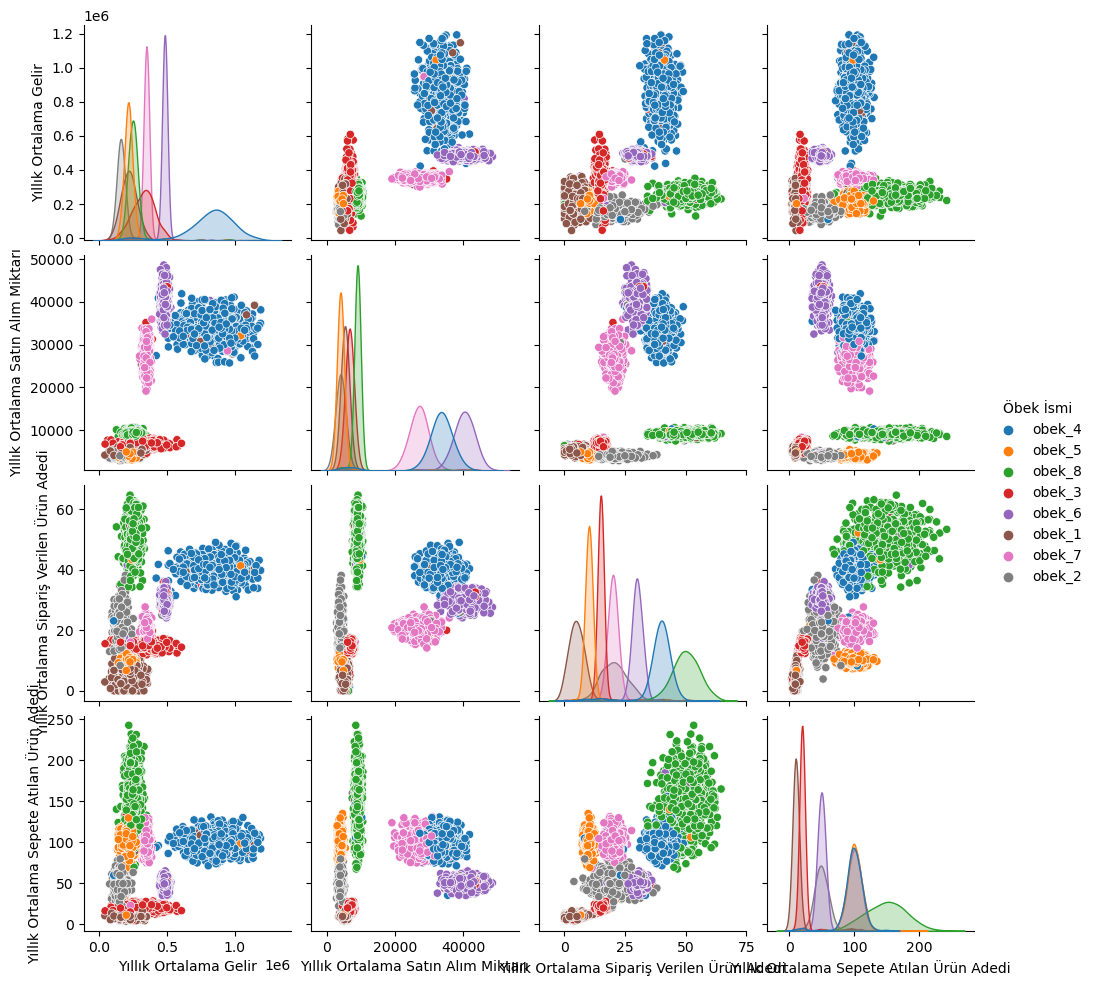

In [33]:
plt.rcParams['font.size'] = 10.0
sns.pairplot(train_df, hue='Öbek İsmi')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

In [34]:
num_cols

['Yıllık Ortalama Gelir',
 'Yıllık Ortalama Satın Alım Miktarı',
 'Yıllık Ortalama Sipariş Verilen Ürün Adedi',
 'Yıllık Ortalama Sepete Atılan Ürün Adedi']

### Corelations<a class="corr" id="corr"></a>

In [35]:
corr = train_df[num_cols].corr()

<Axes: >

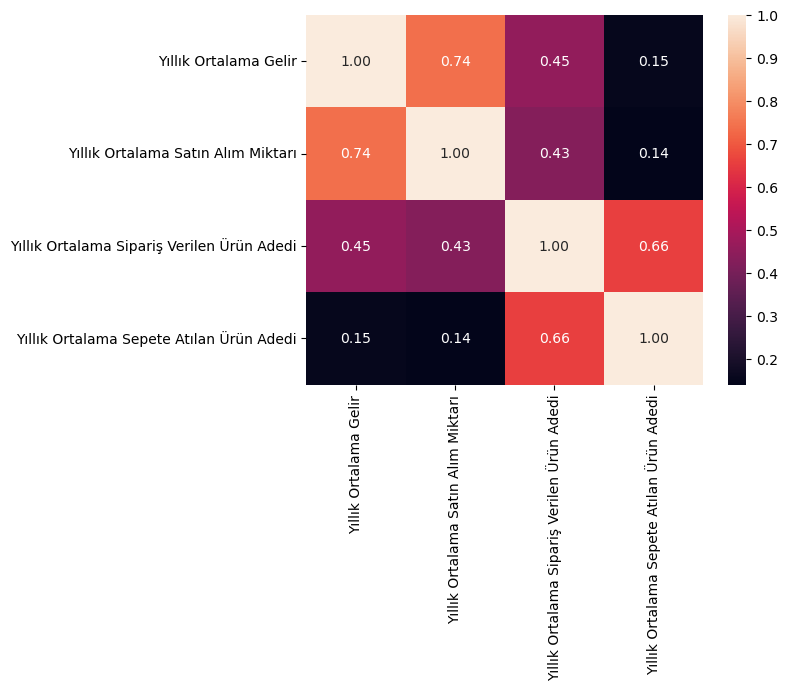

In [36]:
sns.heatmap(corr, annot=True, fmt=".2f")

***When we look at the correlation result, we can say that there is a strong correlation between "Annual Average Income" and "Annual Average Purchase Amount".***

## Data Preprocessing & Feature Engineering<a class="data_pr_feature_eng" id="data_pr_feature_eng"></a>

## Feature Engineering<a class="feature_eng" id="feature_eng"></a>

In [37]:
train_df["Yıllık Ortalama Gelir"] = np.log1p(train_df["Yıllık Ortalama Gelir"])

<Axes: title={'center': 'Yıllık Ortalama Gelir'}>

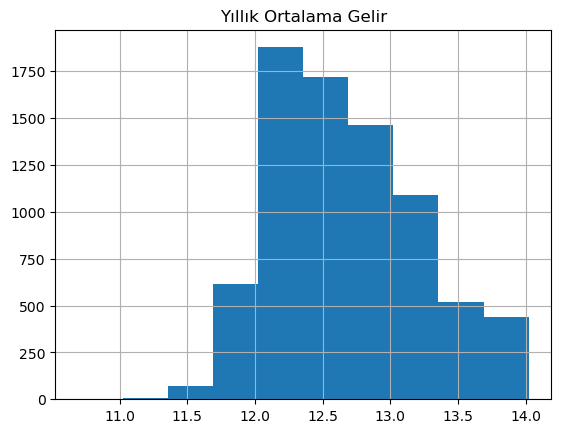

In [38]:
plt.title("Yıllık Ortalama Gelir")
train_df["Yıllık Ortalama Gelir"].hist()

In [39]:
train_df.head()

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,13.525516,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,obek_4,102.936904
1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,12.414304,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,obek_5,82.176053
2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,12.500918,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,obek_8,141.661426
3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,12.699924,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,obek_3,17.097397
4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,12.892781,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,obek_3,20.470459


In [40]:
train_df["Total Gelir"] = train_df["Yıllık Ortalama Gelir"] - train_df["Yıllık Ortalama Satın Alım Miktarı"]
train_df["Yıllık Satın Alınmayan Ürün Adedi"] = train_df["Yıllık Ortalama Sepete Atılan Ürün Adedi"] - train_df["Yıllık Ortalama Sipariş Verilen Ürün Adedi"]

In [41]:
train_df["Yıllık Ürün Harcama"] = train_df["Yıllık Ortalama Gelir"] + 1.0 / train_df["Yıllık Ortalama Sipariş Verilen Ürün Adedi"] + 1.0
train_df["Yıllık Tek Ürün Alım Miktari"] = train_df["Yıllık Ortalama Satın Alım Miktarı"] + 1.0 / train_df["Yıllık Ortalama Sipariş Verilen Ürün Adedi"] + 1.0 
train_df["Yıllık Ortalam Alınmayan ürün Miktari"] = train_df["Yıllık Tek Ürün Alım Miktari"] * train_df["Yıllık Satın Alınmayan Ürün Adedi"]

In [42]:
def calculate_harcama(row, product_category):
    if row["En Çok İlgilendiği Ürün Grubu"] == product_category:
        return row["Yıllık Ortalama Satın Alım Miktarı"]
    else:
        return 0

In [43]:
train_df["Toplam Alışveriş Miktarı"] = train_df["Yıllık Ortalama Satın Alım Miktarı"] * train_df["Yıllık Ortalama Sipariş Verilen Ürün Adedi"] 
train_df["Ürün Çeşitliliği"] = train_df["Yıllık Ortalama Sipariş Verilen Ürün Adedi"].apply(lambda x: "Düşük" if x < 5 else "Orta" if 5 <= x <= 10 else "Yüksek")
train_df["Sipariş Yoğunluğu"] = train_df["Yıllık Ortalama Sipariş Verilen Ürün Adedi"] / train_df["Yıllık Ortalama Satın Alım Miktarı"] + 1.0

In [44]:
for productcategory in train_df["En Çok İlgilendiği Ürün Grubu"].unique():
    train_df[f"Harcama{productcategory}"] = train_df.apply(lambda row: calculate_harcama(row, productcategory), axis=1)

## Data Preprocessing<a class="data_pro" id="data_pro"></a>

### Outliers<a class="outliers" id="outliers"></a>

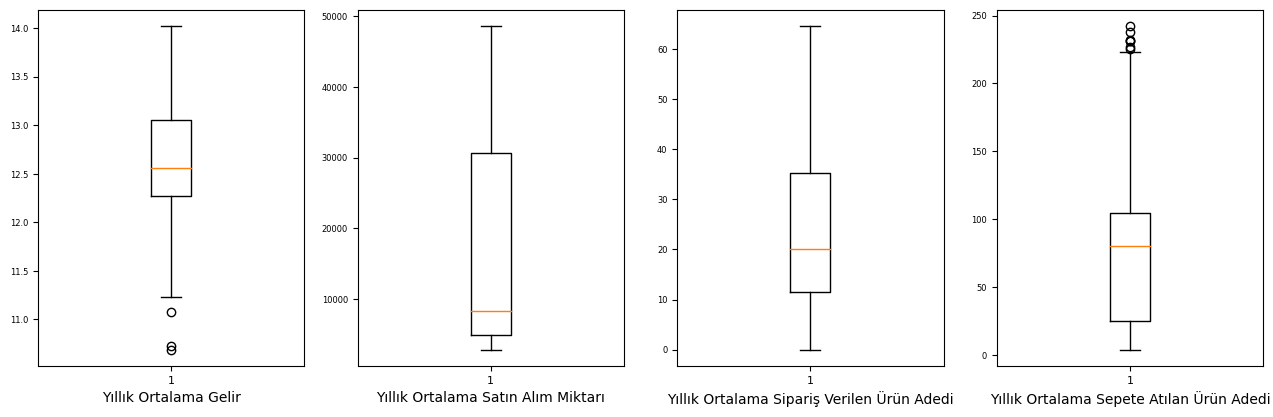

In [45]:
width_cols = 4
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
plt.subplots_adjust(right=1)
plt.subplots_adjust(top=1)
for i, col in enumerate(num_cols, start=1):
    plt.subplot(math.ceil(len(num_cols) / width_cols), width_cols, i)
    plt.boxplot(train_df[col])
    plt.xlabel(col, fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=6)
    
plt.show();

<Axes: >

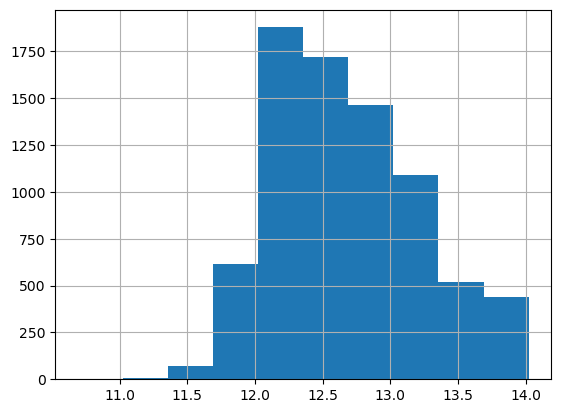

In [46]:
train_df["Yıllık Ortalama Gelir"].hist()

***As a result of the data visualization, the variable "Annual Average Number of Items Discarded in Cart" has a few outliers.***

#### multivariate outlier<a class="mult_outlier" id="mult_outlier"></a>

In [47]:
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(train_df[num_cols])
score_train = clf.negative_outlier_factor_
np.sort(score_train)[0:10]

array([-6.52539157, -5.71362652, -4.87093297, -3.74046032, -3.46758222,
       -3.384328  , -3.30206469, -3.04788343, -2.83988743, -2.83616562])

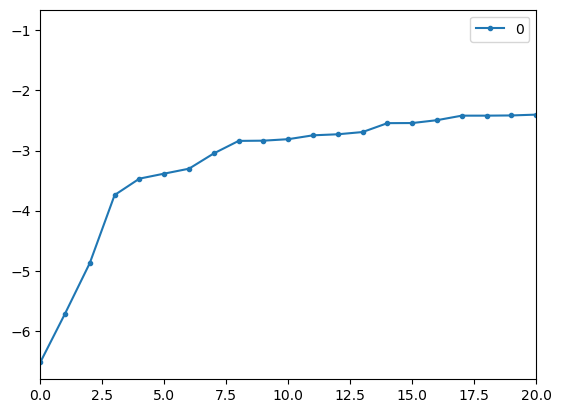

In [48]:
scores = pd.DataFrame(np.sort(score_train))
scores.plot(stacked=True, xlim=[0, 20], style='.-')
plt.show()

In [49]:
th = np.sort(score_train)[7]
th

-3.0478834315480863

In [50]:
train_df[score_train < th].head()

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,...,Yıllık Tek Ürün Alım Miktari,Yıllık Ortalam Alınmayan ürün Miktari,Toplam Alışveriş Miktarı,Ürün Çeşitliliği,Sipariş Yoğunluğu,HarcamaElektronik ve Teknolojik Ürünler,HarcamaSpor Malzemeleri,HarcamaGiyim,HarcamaEv ve Mobilya,HarcamaKozmetik
557,Erkek,18-30,Bekar,Ortaokul Mezunu,Kendi İşinin Sahibi,12.514790,Küçük Şehir,Spor Malzemeleri,7504.386078,49.517488,...,7505.406272,8.266987e+05,371598.348794,Yüksek,1.006598,0.000000,7504.386078,0.0,0.0,0.000000
3504,Erkek,51-60,Evli,Lise Mezunu,İşsiz veya Düzenli Bir İşi Yok,12.358382,Küçük Şehir,Elektronik ve Teknolojik Ürünler,5140.099264,11.414808,...,5141.186870,4.661854e+05,58673.246195,Yüksek,1.002221,5140.099264,0.000000,0.0,0.0,0.000000
4711,Erkek,31-40,Bekar,Lise Mezunu,İşsiz veya Düzenli Bir İşi Yok,12.405819,Büyük Şehir,Elektronik ve Teknolojik Ürünler,5453.050328,9.298798,...,5454.157869,4.556426e+05,50706.812397,Orta,1.001705,5453.050328,0.000000,0.0,0.0,0.000000
5000,Erkek,18-30,Evli,Üniversite Mezunu,Kendi İşinin Sahibi,12.550091,Büyük Şehir,Kozmetik,7465.753162,45.839764,...,7466.774978,8.038033e+05,342228.362206,Yüksek,1.006140,0.000000,0.000000,0.0,0.0,7465.753162
5659,Erkek,41-50,Evli,Ortaokul Mezunu,Düzenli ve Ücretli Bir İşi Var,12.720012,Büyük Şehir,Elektronik ve Teknolojik Ürünler,17757.337353,17.462262,...,17758.394620,1.461865e+06,310083.275306,Yüksek,1.000983,17757.337353,0.000000,0.0,0.0,0.000000


In [51]:
train_df[score_train < th].shape

(7, 26)

In [52]:
train_df[score_train < th].drop(axis=0, labels=train_df[score_train < th].index, inplace=True)

***If we want to find the outliers between the variables, we found it with the multivariate outlier (Local Outlier Factor).***

### Missing Value<a class="miss_value" id="miss_value"></a>

In [53]:
train_df.isnull().values.any()

True

In [54]:
train_df.head()

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,...,Yıllık Tek Ürün Alım Miktari,Yıllık Ortalam Alınmayan ürün Miktari,Toplam Alışveriş Miktarı,Ürün Çeşitliliği,Sipariş Yoğunluğu,HarcamaElektronik ve Teknolojik Ürünler,HarcamaSpor Malzemeleri,HarcamaGiyim,HarcamaEv ve Mobilya,HarcamaKozmetik
0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,13.525516,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,...,32011.927683,2.100823e+06,1.194347e+06,Yüksek,1.001166,32010.900881,0.000000,0.000000,0.0,0.0
1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,12.414304,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,...,4146.816435,2.928532e+05,4.790329e+04,Yüksek,1.002787,0.000000,4145.729891,0.000000,0.0,0.0
2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,12.500918,Küçük Şehir,Giyim,9924.379414,55.353236,...,9925.397480,8.566431e+05,5.493465e+05,Yüksek,1.005578,0.000000,0.000000,9924.379414,0.0,0.0
3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,12.699924,Kırsal,Giyim,6417.780714,15.417239,...,6418.845576,1.078468e+04,9.894446e+04,Yüksek,1.002402,0.000000,0.000000,6417.780714,0.0,0.0
4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,12.892781,Büyük Şehir,Giyim,7886.663061,14.689837,...,7887.731135,4.559599e+04,1.158538e+05,Yüksek,1.001863,0.000000,0.000000,7886.663061,0.0,0.0


### Label Encoder<a class="label_enc" id="label_enc"></a>

In [55]:
cat_cols, num_cols, cat_but_car = split_data(train_df)

Observations: 7800
Variables: 26
cat_cols: 10
num_cols: 16
cat_but_car: 0
num_but_cat: 0


In [56]:
label_cols = [col for col in train_df.columns if train_df[col].nunique() == 2 and train_df[col].dtypes == "O"]
label_cols

['Cinsiyet', 'Medeni Durum', 'Eğitime Devam Etme Durumu']

In [57]:
for col in label_cols:
    labelEncoder = LabelEncoder()
    train_df[col] = labelEncoder.fit_transform(train_df[col])
train_df.head()

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,...,Yıllık Tek Ürün Alım Miktari,Yıllık Ortalam Alınmayan ürün Miktari,Toplam Alışveriş Miktarı,Ürün Çeşitliliği,Sipariş Yoğunluğu,HarcamaElektronik ve Teknolojik Ürünler,HarcamaSpor Malzemeleri,HarcamaGiyim,HarcamaEv ve Mobilya,HarcamaKozmetik
0,1,31-40,0,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,13.525516,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,...,32011.927683,2.100823e+06,1.194347e+06,Yüksek,1.001166,32010.900881,0.000000,0.000000,0.0,0.0
1,0,>60,1,Lise Mezunu,Kendi İşinin Sahibi,12.414304,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,...,4146.816435,2.928532e+05,4.790329e+04,Yüksek,1.002787,0.000000,4145.729891,0.000000,0.0,0.0
2,0,18-30,0,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,12.500918,Küçük Şehir,Giyim,9924.379414,55.353236,...,9925.397480,8.566431e+05,5.493465e+05,Yüksek,1.005578,0.000000,0.000000,9924.379414,0.0,0.0
3,0,51-60,1,Lise Mezunu,Kendi İşinin Sahibi,12.699924,Kırsal,Giyim,6417.780714,15.417239,...,6418.845576,1.078468e+04,9.894446e+04,Yüksek,1.002402,0.000000,0.000000,6417.780714,0.0,0.0
4,0,31-40,1,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,12.892781,Büyük Şehir,Giyim,7886.663061,14.689837,...,7887.731135,4.559599e+04,1.158538e+05,Yüksek,1.001863,0.000000,0.000000,7886.663061,0.0,0.0


***We detected variables with binary unique values and converted them to values consisting of (0, 1) with the Label Encoder***

In [58]:
education_state_encoding = {
    "Eğitimsiz": 0,
    "İlkokul Mezunu": 1,
    "Ortaokul Mezunu": 2,
    "Lise Mezunu": 3,
    "Yüksekokul Mezunu": 4,
    "Üniversite Mezunu": 5,
    "Yüksek Lisans Mezunu": 6,
    "Doktora Mezunu": 7,
    "Doktora Ötesi": 8,
}
train_df["Eğitim Düzeyi"] = train_df["Eğitim Düzeyi"].replace(education_state_encoding)

In [59]:
train_df["Yaş Grubu"].unique()

array(['31-40', '>60', '18-30', '51-60', '41-50'], dtype=object)

In [60]:
age_group_encoding = {
    "18-30": 0,
    "31-40": 1,
    "41-50": 2,
    "51-60": 3,
    ">60": 4
}
train_df["Yaş Grubu"] = train_df["Yaş Grubu"].replace(age_group_encoding)

In [61]:
train_df[target_name].isnull().sum()

2340

In [62]:
group_names = {
    "obek_1": 0,
    "obek_2": 1,
    "obek_3": 2,
    "obek_4": 3,
    "obek_5": 4,
    "obek_6": 5,
    "obek_7": 6,
    "obek_8": 7
}
train_df[target_name] = train_df[target_name].replace(group_names)

In [63]:
train_df.shape

(7800, 26)

***Since the values here are ordinal values, we decided to encode it ourselves.***

### One Hot Encoding<a class="one_hot_enc" id="one_hot_enc"></a>

In [64]:
one_hot_labels = train_df.select_dtypes("object").columns
one_hot_labels = [col for col in one_hot_labels if "Öbek İsmi" not in col]
one_hot_labels

['İstihdam Durumu',
 'Yaşadığı Şehir',
 'En Çok İlgilendiği Ürün Grubu',
 'Ürün Çeşitliliği']

In [65]:
train_df[one_hot_labels].head()

,İstihdam Durumu,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Ürün Çeşitliliği
0,Düzenli ve Ücretli Bir İşi Var,Büyük Şehir,Elektronik ve Teknolojik Ürünler,Yüksek
1,Kendi İşinin Sahibi,Küçük Şehir,Spor Malzemeleri,Yüksek
2,Düzenli ve Ücretli Bir İşi Var,Küçük Şehir,Giyim,Yüksek
3,Kendi İşinin Sahibi,Kırsal,Giyim,Yüksek
4,İşsiz veya Düzenli Bir İşi Yok,Büyük Şehir,Giyim,Yüksek


In [66]:
train_df = pd.get_dummies(train_df, columns=one_hot_labels, drop_first=True)
train_df.head()

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi,...,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Ürün Çeşitliliği_Orta,Ürün Çeşitliliği_Yüksek
0,1,1,0,6,13.525516,32010.900881,37.310644,1,3.0,102.936904,...,0,0,0,0,0,0,0,0,0,1
1,0,4,1,3,12.414304,4145.729891,11.554851,1,4.0,82.176053,...,0,0,1,0,0,0,0,1,0,1
2,0,0,0,3,12.500918,9924.379414,55.353236,0,7.0,141.661426,...,0,0,1,0,0,1,0,0,0,1
3,0,3,1,3,12.699924,6417.780714,15.417239,1,2.0,17.097397,...,0,0,0,1,0,1,0,0,0,1
4,0,1,1,2,12.892781,7886.663061,14.689837,1,2.0,20.470459,...,1,0,0,0,0,1,0,0,0,1


In [67]:
train_df.shape

(7800, 34)

***We detected multiple unique, non-sequential variables and encoded them into separate variables (0, 1) with the one hot encoder method.***

### Scaling<a class="scaling" id="scaling"></a>

In [68]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7800 entries, 0 to 7799
Data columns (total 34 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Cinsiyet                                        7800 non-null   int64  
 1   Yaş Grubu                                       7800 non-null   int64  
 2   Medeni Durum                                    7800 non-null   int64  
 3   Eğitim Düzeyi                                   7800 non-null   int64  
 4   Yıllık Ortalama Gelir                           7800 non-null   float64
 5   Yıllık Ortalama Satın Alım Miktarı              7800 non-null   float64
 6   Yıllık Ortalama Sipariş Verilen Ürün Adedi      7800 non-null   float64
 7   Eğitime Devam Etme Durumu                       7800 non-null   int64  
 8   Öbek İsmi                                       5460 non-null   float64
 9   Yıllık Ortalama Sepete Atılan Ürün Adedi 

In [69]:
train_df.loc[train_df.isin([np.inf, -np.inf]).any(1), num_cols] = 0

In [70]:
train_df.loc[train_df.isin([np.inf, -np.inf]).any(1), num_cols].shape

(0, 16)

In [71]:
robust = RobustScaler()
train_df[num_cols] = robust.fit_transform(train_df[num_cols])
train_df.tail()

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi,...,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Ürün Çeşitliliği_Orta,Ürün Çeşitliliği_Yüksek
7795,1,0,0,4,-0.121388,0.046248,0.919249,0,NaN,0.467961,...,0,0,1,0,1,0,0,0,0,1
7796,1,1,1,3,-0.486875,-0.166351,-0.000545,1,NaN,-0.435200,...,1,0,0,1,1,0,0,0,0,1
7797,0,4,1,6,0.289356,0.550932,-0.049516,1,NaN,0.255418,...,0,0,0,0,1,0,0,0,0,1
7798,0,0,1,8,-0.370506,-0.161116,-0.393973,1,NaN,0.218869,...,0,0,1,0,0,0,0,1,0,1
7799,0,3,1,5,0.763751,1.328916,0.452736,0,NaN,-0.510519,...,0,1,0,0,0,0,0,0,0,1


In [72]:
train_df.shape

(7800, 34)

***After the feature engineering processes, infinite values were created and to solve this problem, we assigned zero to these observations, scaled the numerical variables with the outlier-proof robot scaler method.***

### Split Data <a class="split_data" id="split_data"></a>

In [73]:
train_df.shape

(7800, 34)

In [74]:
train = train_df[train_df[target_name].notnull()]
test = train_df[train_df[target_name].isnull()]

In [75]:
X_train = train.drop(target_name, axis=1)
y_train = train[target_name]

In [76]:
print("X train shape : ", X_train.shape)
print("Y train shape : ", y_train.shape)
print("Test shape : ", test.shape)

X train shape :  (5460, 33)
Y train shape :  (5460,)
Test shape :  (2340, 34)


***we split the dataset into X_train and y_train to use in the model***

## Base Model<a class="base_model" id="base_model"></a>

### Model Params<a class="model_params" id="model_params"></a>

In [77]:
 classifiers = [('LR', LogisticRegression()),
                   ('KNN', KNeighborsClassifier()),
                   ("SVC", SVC()),
                   ("CART", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier()),
                   ('GBM', GradientBoostingClassifier()),
                   ('XGBoost', XGBClassifier(eval_metric='logloss')),
                   ('LightGBM', LGBMClassifier(verbose=-1)),
                   ('CatBoost', CatBoostClassifier(verbose=False))
                   ]

In [78]:
X_train.head()

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi,Total Gelir,...,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Ürün Çeşitliliği_Orta,Ürün Çeşitliliği_Yüksek
0,1,1,0,6,1.230089,0.915856,0.726308,1,0.283599,-0.915843,...,0,0,0,0,0,0,0,0,0,1
1,0,4,1,3,-0.186421,-0.163426,-0.360357,1,0.023061,0.163431,...,0,0,1,0,0,0,0,1,0,1
2,0,0,0,3,-0.076011,0.060394,1.487545,0,0.769570,-0.060393,...,0,0,1,0,0,1,0,0,0,1
3,0,3,1,3,0.177670,-0.075425,-0.197399,1,-0.793640,0.075437,...,0,0,0,1,0,1,0,0,0,1
4,0,1,1,2,0.423514,-0.018531,-0.228089,1,-0.751310,0.018550,...,1,0,0,0,0,1,0,0,0,1


### Test Train set by Cross Validation<a class="cross_val" id="cross_val"></a>

In [79]:
for name, classifier in classifiers:
    cv_results = cross_validate(classifier, X_train, y_train, cv=5, scoring="accuracy")
    print(f"accuracy : {round(cv_results['test_score'].mean(), 4)} ({name}) ")

accuracy : 0.4628 (LR) 
accuracy : 0.865 (KNN) 
accuracy : 0.6518 (SVC) 
accuracy : 0.8984 (CART) 
accuracy : 0.9542 (RF) 
accuracy : 0.9445 (GBM) 
accuracy : 0.9537 (XGBoost) 
accuracy : 0.9537 (LightGBM) 
accuracy : 0.9546 (CatBoost) 


## Hyperparameter Optimization<a class="hyper_opt" id="hyper_opt"></a>

### Choose Model Params<a class="choose_model_params" id="choose_model_params"></a>

In [80]:
# knn_params = {"n_neighbors": range(2, 50)}

# cart_params = {'max_depth': range(1, 20),
#                "min_samples_split": range(2, 30)}

# rf_params = {"max_depth": [8, 15, None],
#              "max_features": [5, 7, "sqrt"],
#              "min_samples_split": [15, 20],
#              "n_estimators": [200, 300]}

# xgboost_params = {"learning_rate": [0.1, 0.01],
#                   "max_depth": [5, 8],
#                   "n_estimators": [100, 200]}

# lightgbm_params = {"learning_rate": [0.01, 0.1],
#                    "n_estimators": [300, 500]}

# catboost_params = {"iterations": [200, 500],
#                    "learning_rate": [0.01, 0.1],
#                    "depth": [3, 6]}

In [81]:
# classifiers = [('KNN', KNeighborsClassifier()   , knn_params),
#                ("CART", DecisionTreeClassifier(), cart_params),
#                ("RF", RandomForestClassifier(verbose=False), rf_params),
#                ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgboost_params),
#                ('LightGBM', LGBMClassifier(verbose=-1, device_type='GPU'), lightgbm_params),
#                ('CatBoost', CatBoostClassifier(verbose=False, task_type="GPU"), catboost_params)
#               ]


### Optimization Base Model By Grid Search<a class="grid_search_opt" id="grid_search_opt"></a>

In [82]:
# best_models = {}
# for name, classifier, params in classifiers:
#     cv_results = cross_validate(classifier, X_train, y_train, cv=5, scoring="accuracy")
#     print(f"accuracy 1: {round(cv_results['test_score'].mean(), 4)} ({name}) ")
    
#     best_model_grid = GridSearchCV(classifier, params, cv=5, n_jobs=-1, verbose=-1).fit(X_train, y_train)
#     final_model = classifier.set_params(**best_model_grid.best_params_)
    
#     cv_results = cross_validate(classifier, X_train, y_train, cv=5, scoring="accuracy")
#     print(f"accuracy 2: {round(cv_results['test_score'].mean(), 4)} ({name}) ")
#     print(f"{name} : ", best_model_grid.best_params_, end="\n")
#     print("*************************************************")
#     best_models[name] = final_model

In [83]:
rf_random_params = {"max_depth": np.random.randint(5, 50, 10),
                    "max_features": [3, 5, 7, "sqrt"],
                    "min_samples_split": np.random.randint(2, 50, 20),
                    "n_estimators": [int(x) for x in np.linspace(start=200, stop=1500, num=10)]}

lightgbm_random_params = {"learning_rate": [0.02,0.01, 0.1, 0.2],
                   "n_estimators": [int(x) for x in np.linspace(start=200, stop=1500, num=10)],
                   "min_data_in_leaf": np.random.randint(2, 50, 20),
                   "max_depth": np.random.randint(5, 50, 10)
                  }

catboost_random_params = {"iterations": [int(x) for x in np.linspace(start=200, stop=1500, num=10)],
                          "learning_rate": [0.02,0.01, 0.1, 0.2],
                          "depth": np.random.randint(5, 50, 10)
                    }


In [84]:
classifiers_random = [("RF", RandomForestClassifier(verbose=False), rf_random_params),
               ('LightGBM', LGBMClassifier(verbose=-1, device_type='GPU'), lightgbm_random_params),
               ('CatBoost', CatBoostClassifier(verbose=False, task_type="GPU"), catboost_random_params)
              ]

### Random Search Optimization<a class="random_search_opt" id="random_search_opt"></a>

In [85]:
best_models_random = {}
for name, classifier, params in classifiers_random:
    cv_results = cross_validate(classifier, X_train, y_train, cv=5, scoring="accuracy")
    print(f"accuracy 1: {round(cv_results['test_score'].mean(), 4)} ({name}) ")
    
    best_random = RandomizedSearchCV(estimator=classifier,
                               param_distributions=params,
                               n_iter=100,  # denenecek parametre sayısı
                               cv=3,
                               verbose=False,
                               random_state=42,
                               n_jobs=-1).fit(X_train, y_train)
    
    final_model_random = classifier.set_params(**best_random.best_params_)
    
    cv_results = cross_validate(classifier, X_train, y_train, cv=5, scoring="accuracy")
    print(f"accuracy 2: {round(cv_results['test_score'].mean(), 4)} ({name}) ")
    print(f"{name} : ", best_random.best_params_, end="\n")
    print("*************************************************")
    best_models_random[name] = final_model_random

accuracy 1: 0.9542 (RF) 
accuracy 2: 0.9546 (RF) 
RF :  {'n_estimators': 922, 'min_samples_split': 9, 'max_features': 3, 'max_depth': 40}
*************************************************


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py", line 748, in fit
    self._Booster = train(
  File "/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "/opt/conda/lib/python3.10/site-packages/lightgbm/basic.py", line 2610, in __init__
    _safe_call(_LIB.LGBM_BoosterCreate(
  File "/opt/conda/lib/python3.10/site-packages/lightgbm/basic.py", line 125, in _safe_call
    raise LightGBMError(_LIB.LGBM_GetLastError().decode('utf-8'))
lightgbm.basic.LightGBMError: GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1


In [ ]:
rf_params = {"max_depth": [30, 35, 37, 40],
             "max_features": [1, 3, 4, 6],
             "min_samples_split": [3, 5, 8, 10],
             "n_estimators": [910, 920, 922, 930]}
# RF :  {'n_estimators': 922, 'min_samples_split': 5, 'max_features': 3, 'max_depth': 37}

lightgbm_params = {"learning_rate": [0.01, 0.1, 0.2],
                   "n_estimators": [1490, 1500, 1550],
                  "min_data_in_leaf": [6, 8, 11, 13],
                  "max_depth": [17, 20, 22, 25, 30]}

# LightGBM :  {'n_estimators': 1500, 'min_data_in_leaf': 8, 'max_depth': 20, 'learning_rate': 0.2}

catboost_params = {"iterations": [200, 500],
                   "learning_rate": [0.01, 0.1],
                   "depth": [3, 6]}


In [ ]:
# rf_params = {'max_depth': 20, 'max_features': 3, 'min_samples_split': 37, 'n_estimators': 360}
# lightgbm_params = {'learning_rate': 0.01, 'max_depth': 15, 'min_samples_leaf': 25, 'n_estimators': 480}
# catboost_params = {'depth': 6, 'iterations': 200, 'learning_rate': 0.1}

In [ ]:
classifiers = [("RF", RandomForestClassifier(verbose=False), rf_params),
               ('LightGBM', LGBMClassifier(verbose=-1, device_type='GPU'), lightgbm_params),
               ('CatBoost', CatBoostClassifier(verbose=False, task_type="GPU"), catboost_params)
              ]

In [ ]:
# best_models = {}
# for name, classifier, params in classifiers:
#     final_model = classifier.set_params(**params)
#     best_models[name] = final_model

In [ ]:
best_models = {}
for name, classifier, params in classifiers:
    cv_results = cross_validate(classifier, X_train, y_train, cv=5, scoring="accuracy")
    print(f"accuracy 1: {round(cv_results['test_score'].mean(), 4)} ({name}) ")
    
    best_model_grid = GridSearchCV(classifier, params, cv=5, n_jobs=-1, verbose=-1).fit(X_train, y_train)
    final_model = classifier.set_params(**best_model_grid.best_params_)
    
    cv_results = cross_validate(classifier, X_train, y_train, cv=5, scoring="accuracy")
    print(f"accuracy 2: {round(cv_results['test_score'].mean(), 4)} ({name}) ")
    print(f"{name} : ", best_model_grid.best_params_, end="\n")
    print("*************************************************")
    best_models[name] = final_model

***We made the Random Search algorithm select the appropriate hyperparameters for us first, and we used the grid search algorithm by entering values close to the hyperparameters we found with random search. We preferred the Random Search algorithm because of its speed.***

## Stacking & Ensemble Learning<a class="stack_ens_learn" id="stack_ens_learn"></a>

### Votine Model<a class="votine_model" id="votine_model"></a>

In [ ]:
voting_clf = VotingClassifier(estimators=[('RF', best_models["RF"]),
                                          ('LightGBM', best_models["LightGBM"]),
                                          ('CatBoost', best_models["CatBoost"])],
                                  voting='soft').fit(X_train, y_train)

In [ ]:
cv_results = cross_validate(voting_clf, X_train, y_train, cv=3, scoring=["accuracy", "f1", "roc_auc"])
print(f"Accuracy: {cv_results['test_accuracy'].mean()}")

In [ ]:
X_test = test.drop("Öbek İsmi", axis=1)

In [ ]:
X_test.head()

***The voting model will calculate the prediction values it receives from the edge model and give the final prediction values for us.***

## Predictions<a class="predict" id="predict"></a>

### Predict Model<a class="predict_model" id="predict_model"></a>

In [ ]:
y_pred = voting_clf.predict(X_test)

In [ ]:
y_pred = pd.DataFrame(y_pred, columns=["Öbek İsmi"], dtype=int)

In [ ]:
y_pred.head()

In [ ]:
group_names = {
    0: "obek_1",
    1: "obek_2",
    2: "obek_3",
    3: "obek_4",
    4: "obek_5",
    5: "obek_6",
    6: "obek_7",
    7: "obek_8"
}
test = test.reset_index()
test["Öbek İsmi"] = y_pred["Öbek İsmi"].replace(group_names)

In [ ]:
test.head()

In [ ]:
test.reset_index(inplace=True)

In [ ]:
test["id"] = test.index

In [ ]:
test[["id", "Öbek İsmi"]].head()

### Load Data in Sample Submission file<a class="load_data" id="load_data"></a>

In [ ]:
test[["id", "Öbek İsmi"]].to_csv("sample_submission.csv", index=False)

### Fit best Model<a class="fit_model" id="fit_model"></a>

In [ ]:
for model in best_models.values():
    model.fit(X_train, y_train)

### Feature Impotance<a class="feature_importance" id="feature_importance"></a>

In [ ]:
for model in best_models.values():
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': X_train.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:len(X_train)])
    plt.title('Features')
    plt.tight_layout()
    plt.show()